In [1]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
old_model = ChoiceModel()

In [3]:
data = pd.DataFrame(columns=['series','period','PPI','CVI','DCI','NUM'])

In [4]:
series = 'true_data'
for period in range(1,10):
    old_model.roll_back(period)
    PPI,CVI,DCI = old_model.evaluate()
    num = len(list(old_model.graph.nodes))
    data .loc[len(data )] = [series,period,PPI,CVI,DCI,num]
    old_model.visualize(file_name=f"old_graph/period_{period}.html")

In [5]:
true_max_PPI = data['PPI'].max()
true_min_PPI = data['PPI'].min()
true_max_CVI = data['CVI'].max()
true_min_CVI = data['CVI'].min()
true_max_DCI = data['DCI'].max()
true_min_DCI = data['DCI'].min()

In [6]:
series = 'sim_data_2'
for period in range(1,4):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = ['sim_baseline',period,PPI,CVI,DCI,num]

In [7]:
sim_data = data[data['series']=='sim_baseline']
sim_max_PPI = sim_data['PPI'].max()
sim_min_PPI = sim_data['PPI'].min()
sim_max_CVI = sim_data['CVI'].max()
sim_min_CVI = sim_data['CVI'].min()
sim_max_DCI = sim_data['DCI'].max()
sim_min_DCI = sim_data['DCI'].min()

In [8]:
series = 'remove_long_term'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [9]:
series = 'remove_short_term'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [10]:
series = 'remove_event'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [11]:
series = 'remove_media'
for period in range(1,10):
    file = f'{series}/{series}_{period}.pkl'
    new_model = ChoiceModel(graph_path=file) 
    num = len(list(new_model.graph.nodes))
    PPI,CVI,DCI = new_model.evaluate()
    data.loc[len(data)] = [series,period,PPI,CVI,DCI,num]

In [12]:
true_data = data[data['series']=='true_data']
sim_data = data[data['series'] != 'true_data']
data.loc[true_data.index,'norm_PPI'] = (true_data['PPI']-true_min_PPI)/(true_max_PPI-true_min_PPI)
data.loc[sim_data.index,'norm_PPI'] = (sim_data['PPI']-sim_min_PPI)/(sim_max_PPI-sim_min_PPI)
data.loc[true_data.index,'norm_SCI'] = (true_data['CVI']-true_min_CVI)/(true_max_CVI-true_min_CVI)
data.loc[sim_data.index,'norm_SCI'] = (sim_data['CVI']-sim_min_CVI)/(sim_max_CVI-sim_min_CVI)
data.loc[true_data.index,'norm_DCI'] = (true_data['DCI']-true_min_DCI)/(true_max_DCI-true_min_DCI)
data.loc[sim_data.index,'norm_DCI'] = (sim_data['DCI']-sim_min_DCI)/(sim_max_DCI-sim_min_DCI)

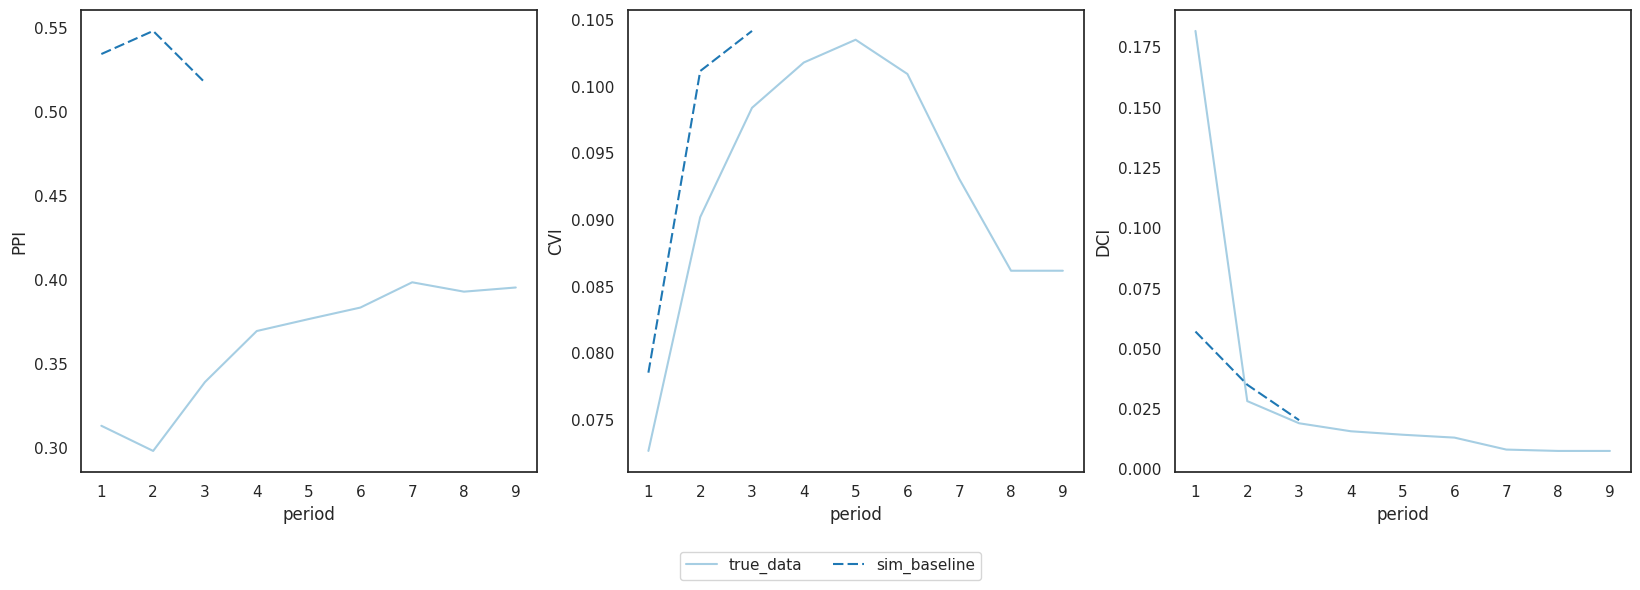

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k:[5,2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='PPI', hue='series', style='series', dashes=line_styles, ax=ax[0], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line2 = sns.lineplot(data=data, x='period', y='CVI', hue='series', style='series', dashes=line_styles, ax=ax[1], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line3 = sns.lineplot(data=data, x='period', y='DCI', hue='series', style='series', dashes=line_styles, ax=ax[2], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()


# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()

In [13]:
data[data['series']!='true_data'].head()

,series,period,PPI,CVI,DCI,NUM
9,sim_baseline,1,0.505090,0.102013,0.136364,185
10,sim_baseline,2,0.544967,0.080168,0.052632,320
11,sim_baseline,3,0.557388,0.076860,0.028986,487
12,sim_baseline,4,0.554996,0.071464,0.022472,559
13,sim_baseline,5,0.558092,0.068677,0.019608,620


In [14]:
data_ = data[(data['series'] == 'true_data') | (data['series'] == 'sim_baseline')]
data_.head()

,series,period,PPI,CVI,DCI,NUM
0,true_data,1,0.313286,0.072668,0.181818,185
1,true_data,2,0.298296,0.090206,0.028302,320
2,true_data,3,0.339319,0.098408,0.019108,489
3,true_data,4,0.369715,0.101806,0.015789,561
4,true_data,5,0.376813,0.103514,0.014354,622


/tmp/ipykernel_16553/1442021828.py:12: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  line1 = sns.lineplot(data=data_, x='period', y='PPI', hue='series', style='series', dashes=line_styles, ax=ax[0],
/tmp/ipykernel_16553/1442021828.py:16: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  line2 = sns.lineplot(data=data_, x='period', y='CVI', hue='series', style='series', dashes=line_styles, ax=ax[1],
/tmp/ipykernel_16553/1442021828.py:20: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  line3 = sns.lineplot(data=data_, x='period', y='DCI', hue='series', style='series', dashes=line_styles, ax=ax[2],


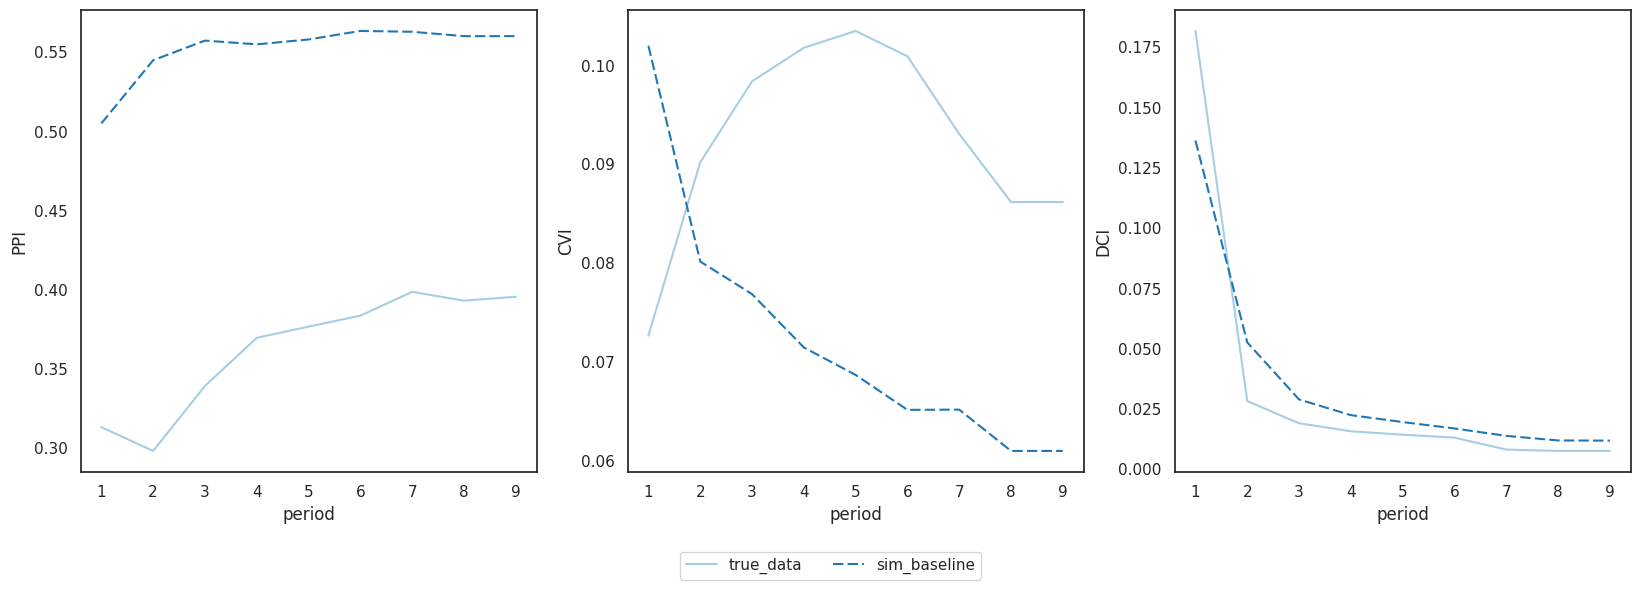

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k:[5,2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data_, x='period', y='PPI', hue='series', style='series', dashes=line_styles, ax=ax[0], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line2 = sns.lineplot(data=data_, x='period', y='CVI', hue='series', style='series', dashes=line_styles, ax=ax[1], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line3 = sns.lineplot(data=data_, x='period', y='DCI', hue='series', style='series', dashes=line_styles, ax=ax[2], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()

ValueError: Could not interpret value `norm_PPI` for `y`. An entry with this name does not appear in `data`.

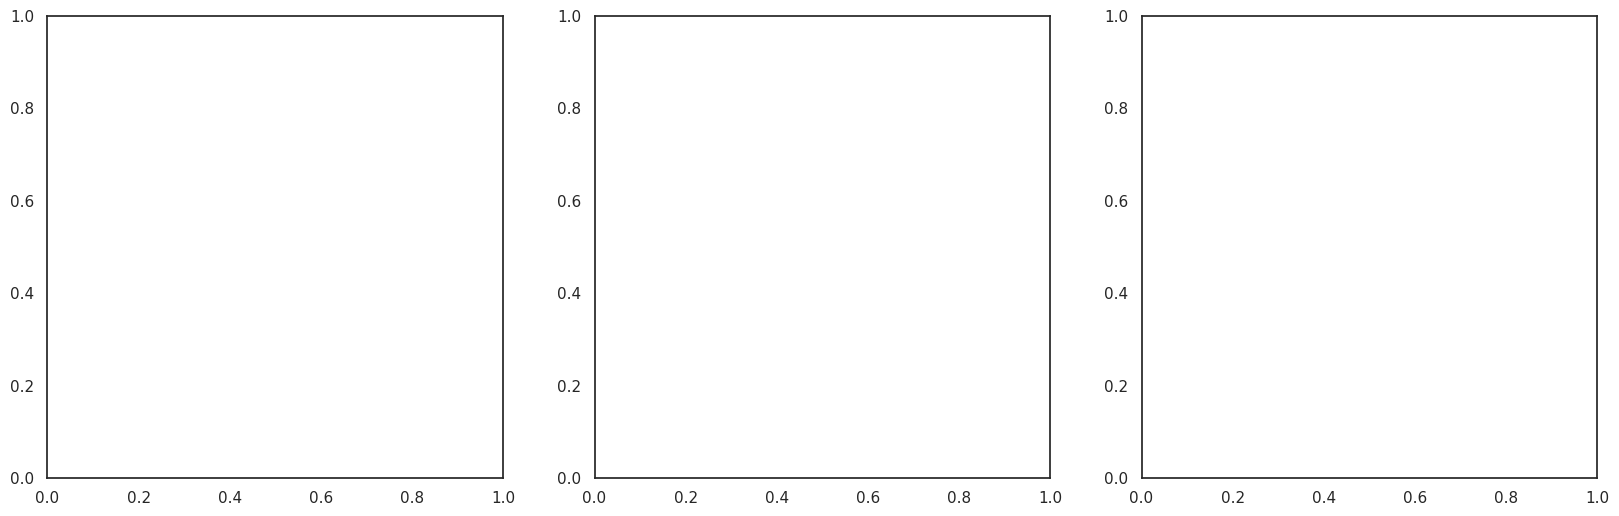

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

series = data['series'].unique().tolist()
line_styles = {k:[5,2] for k in series}
line_styles['true_data'] = []

# Plot the data with legends enabled temporarily
line1 = sns.lineplot(data=data, x='period', y='norm_PPI', hue='series', style='series', dashes=line_styles, ax=ax[0], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line2 = sns.lineplot(data=data, x='period', y='norm_SCI', hue='series', style='series', dashes=line_styles, ax=ax[1], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                      palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )
line3 = sns.lineplot(data=data, x='period', y='norm_DCI', hue='series', style='series', dashes=line_styles, ax=ax[2], 
                     # palette=['r']+sns.color_palette("rocket_r")[:3]
                     palette = sns.color_palette("Paired")[:len(data['series'].unique())]
                    )

# Get handles and labels from the first plot
handles, labels = line1.get_legend_handles_labels()

# Turn off individual legends
ax[0].legend().remove()
ax[1].legend().remove()
ax[2].legend().remove()

# Add a single legend
fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))
fig.savefig("data1.png")
plt.show()

# Scatter Plot - Period 9

In [ ]:
from choice_model import ChoiceModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = ChoiceModel()
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type']=='Actors']
true_data = pd.DataFrame(columns=["actor_id","age","gender","marrige",
                             "withkids","student","workstatue","residentinneighbor","","contribution","participation","series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    true_data.loc[len(true_data)] = [a,age,gender,marrige,withkids,student,workstatue,
                           residentinneighbor,educationlevel,contribution,participation,"true_data"]

true_data["norm_contribution"] = true_data["contribution"]/true_data["contribution"].max()
true_data["norm_participation"] = true_data["participation"]/true_data["participation"].max()

In [ ]:
model = ChoiceModel(graph_path="sim_data/sim_data_9.pkl")
graph = model.graph
actors = [a for a in graph.nodes() if graph.nodes[a]['type']=='Actors']
sim_data = pd.DataFrame(columns=["actor_id","age","gender","marrige",
                             "withkids","student","workstatue","residentinneighbor","","contribution","participation","series"])
for a in actors:
    contribution = graph.out_degree(a)
    participation = graph.in_degree(a)
    props = graph.nodes[a]['properties']
    age = props['age']
    gender = props['gender']
    marrige = props['marrige']
    withkids = props['withkids']
    student = props['student']
    workstatue = props['workstatue']
    residentinneighbor = props['residentinneighbor']
    educationlevel = props['educationlevel']
    sim_data.loc[len(sim_data)] = [a,age,gender,marrige,withkids,student,workstatue,
                           residentinneighbor,educationlevel,contribution,participation,"sim_baseline"]

sim_data["norm_contribution"] = sim_data["contribution"]/sim_data["contribution"].max()
sim_data["norm_participation"] = sim_data["participation"]/sim_data["participation"].max()

In [ ]:
data = pd.concat([true_data,sim_data], axis=0, ignore_index=True)

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6.5))
sns.set_theme(style="whitegrid")
# sns.despine(fig, left=True, bottom=True)
# Plot without size legend
scatter1 = sns.scatterplot(x="actor_id", y="contribution", size="contribution", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[0])
scatter2 = sns.scatterplot(x="actor_id", y="participation", size="participation", hue="series",
                           sizes=(5, 100), linewidth=0, data=data, ax=ax[1])

# Get handles and labels from the first plot
handles, labels = scatter1.get_legend_handles_labels()
hue_handles = handles[:len(data['series'].unique())+1]
hue_labels = labels[:len(data['series'].unique())+1]
ax[0].legend().remove()
ax[1].legend().remove()

# Create a single legend for the series
ax[0].legend(hue_handles, hue_labels)
ax[1].legend(hue_handles, hue_labels)

# fig.legend(handles, labels, loc='upper center', ncol=len(labels), bbox_to_anchor=(0.5, -0.01))

plt.show()


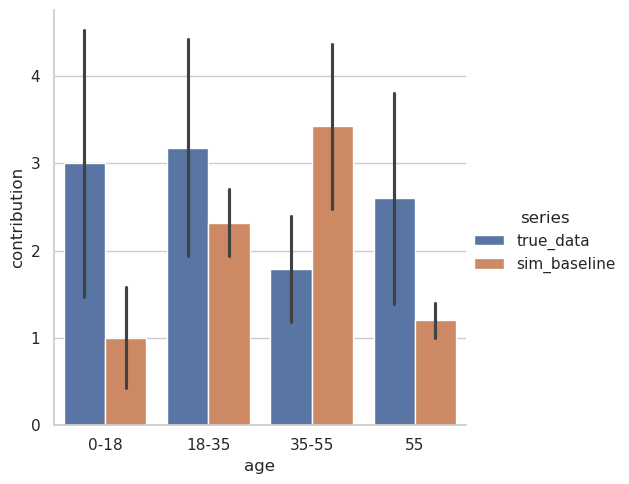

In [78]:
age_order = ['0-18','18-35', '35-55','55']
sns.catplot(data=data,x='age',y='contribution',hue='series',kind='bar', errorbar="se",
            order=age_order
           )
plt.show()

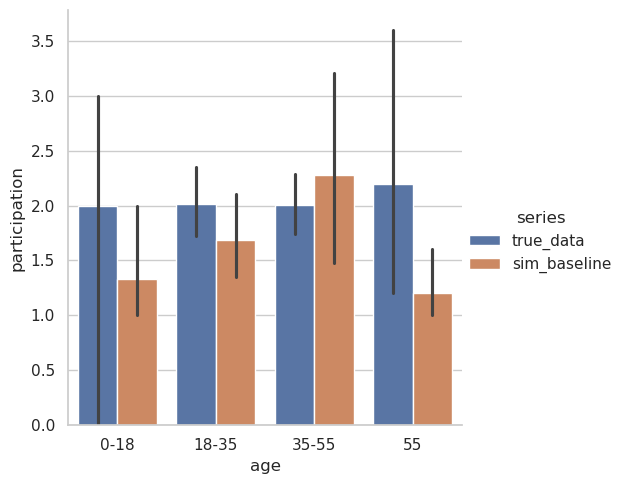

In [79]:
sns.catplot(data=data,x='age',y='participation',hue='series',kind='bar',order=age_order)
plt.show()